# COVID-19 & Health Predictor 

#### - Data Bootcamp Final Project
##### - Cordell, Gibbs, Miller, Ross

# Purpose: 
### Analyze COVID-19 Positivity or Negativity Based on Correlation to Nutrition

# Model: Linear Regression Model

In [1]:
from sklearn.linear_model import LinearRegression

## Library & Dependency Installation

In [2]:
# Scikit-Learn Libraries/Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# Data Frame & Data Manipulation Libraries/Dependencies
import pandas as pd

## Loading the Data

#### Physical Path Import

In [4]:
# Create File Path
file_path = "https://raw.githubusercontent.com/sterlingvm/Data_Bootcamp_Project/projectrepo/final_joined_data.csv"

# Build the Dataframe
dataframe = pd.read_csv(file_path)

In [5]:
# Preview the Data
dataframe.head(130)

,COUNTRY,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,...,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished
0,Albania,Europe,275416,9570.366,225,7.818,44,3497,121.516,1,...,6.7861,1.8845,15.7213,1.5367,0.1515,0.3261,11.7753,31.2304,22.3,6.2
1,Algeria,Africa,265800,606.143,18,0.041,0,6875,15.678,0,...,6.3801,1.1305,7.6189,1.8342,0.1152,1.0310,11.6484,40.3651,26.6,3.9
2,Angola,Africa,99287,302.094,0,0.000,0,1900,5.781,0,...,6.0005,2.0571,0.8311,1.8495,0.0061,0.6463,2.3041,45.0722,6.8,25.0
3,Argentina,Americas,9101319,20137.544,17646,39.043,0,128729,284.825,76,...,6.0435,7.0421,10.2328,3.0536,0.0200,0.9541,4.3503,30.6559,28.5,4.6
4,Armenia,Europe,422900,14271.570,23,0.776,0,8623,291.000,1,...,6.0989,2.2675,9.9407,2.6579,0.1108,0.4705,16.7019,36.4358,20.9,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Uruguay,Americas,902540,25981.870,2817,81.094,0,7213,207.644,3,...,5.3746,3.7863,12.3906,3.4102,0.0131,1.0337,3.9333,32.1076,28.9,0.0
126,Uzbekistan,Europe,238747,713.333,111,0.332,4,1637,4.891,0,...,5.2150,1.8621,11.7952,0.5796,0.0649,0.6109,14.8354,35.5540,15.3,6.3
127,Vanuatu,Western Pacific,8063,2625.144,466,151.720,0,14,4.558,1,...,5.8103,2.7466,1.2692,1.3645,0.0038,0.3674,3.9175,43.3737,23.5,7.2
128,Venezuela (Bolivarian Republic of),Americas,522749,1838.339,235,0.826,0,5709,20.077,0,...,7.6460,3.8328,9.3920,3.4106,0.0009,1.3734,4.1474,35.2416,25.2,21.2


## Connect to Database

In [6]:
# Install Postgres Driver
!wget https://jdbc.postgresql.org/download/postgresql-42.2.16.jar

zsh:1: command not found: wget


##### Build Database Connection

In [7]:
# # Import Module to Communicate with PostgreSQL
# import psycopg2 as pg

# # Import Password Protector
# from getpass import getpass
# passw = getpass('Enter your Password')

# # Build Engine for Connection
# engine = pg.connect(database="Final_Project",  user="postgres", host="localhost", port="5432", password=passw)

# dataframe = pd.read_sql('SELECT covid.*, nutrition."Alcoholic Beverages",nutrition."Animal Products",nutrition."Cereals - Excluding Beer",nutrition."Eggs",nutrition."Fish, Seafood",nutrition."Fruits - Excluding Wine",nutrition."Meat",nutrition."Milk - Excluding Butter",nutrition."Sugar & Sweeteners",nutrition."Treenuts",nutrition."Vegetable Oils",nutrition."Vegetables",nutrition."Vegetal Products",nutrition."Obesity",nutrition."Undernourished" FROM covid INNER JOIN nutrition ON covid."COUNTRY" = nutrition."COUNTRY" ORDER BY "COUNTRY";', con=engine)

In [8]:
dataframe.head()

,COUNTRY,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,...,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished
0,Albania,Europe,275416,9570.366,225,7.818,44,3497,121.516,1,...,6.7861,1.8845,15.7213,1.5367,0.1515,0.3261,11.7753,31.2304,22.3,6.2
1,Algeria,Africa,265800,606.143,18,0.041,0,6875,15.678,0,...,6.3801,1.1305,7.6189,1.8342,0.1152,1.0310,11.6484,40.3651,26.6,3.9
2,Angola,Africa,99287,302.094,0,0.000,0,1900,5.781,0,...,6.0005,2.0571,0.8311,1.8495,0.0061,0.6463,2.3041,45.0722,6.8,25.0
3,Argentina,Americas,9101319,20137.544,17646,39.043,0,128729,284.825,76,...,6.0435,7.0421,10.2328,3.0536,0.0200,0.9541,4.3503,30.6559,28.5,4.6
4,Armenia,Europe,422900,14271.570,23,0.776,0,8623,291.000,1,...,6.0989,2.2675,9.9407,2.6579,0.1108,0.4705,16.7019,36.4358,20.9,4.3


## Process & Preprocess the Data

### Clean the Data

##### Identify Categorical Variables/Columns

In [9]:
# Generate our categorical variable list
categorical_columns = dataframe.dtypes[dataframe.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
dataframe[categorical_columns].nunique()

COUNTRY               131
WHO Region              6
ISO3                  131
WHO_REGION              6
DATA_SOURCE             1
DATE_UPDATED           16
VACCINES_USED          80
FIRST_VACCINE_DATE     67
dtype: int64

In [10]:
dataframe.columns

Index(['COUNTRY', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours', 'Case_Fatality_Ratio',
       'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED',
       'PERSONS_BOOSTER_ADD_DOSE', 'PERSONS_BOOSTER_ADD_DOSE_PER100',
       'Alcoholic Be

##### Determing Bucketing - if categorical column has more than 10 unique values, consider binning!


In [11]:
## OPTIONAL ##

## Analyze frequencies of unique values in categorical column(s)
# column1_counts = dataframe.insert_column_name_here.value_counts()

## Plot the value counts - then determine the cut off(s) for binning
# column1_counts.plot.density()

In [12]:
## OPTIONAL ##

## Determine which values to replace
# replace_column1 = list(column1_counts[column1_counts < cutoff_value].index)

## Replace the column values you'd like to bucket together in the DataFrame
# for value in replace_column1:
  # dataframe.insert_column_name_here = dataframe.insert_column_name_here.replace(value,"New_Bucketed_Value_Name-Ex:'Other'")

## Check to make sure the bucketing/binning was successful
# dataframe.insert_column_name_here.value_counts()

##### Encode the Categorical Values

In [13]:
# Import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [14]:
# # Instantiate LabelEncoder
# encoder = LabelEncoder()

# # Create a copy of the dataframe and encode the data
# dataframe_copy = dataframe.copy()

# # Train the LabelEncoder, convert the text columns to string columns
# for x in categorical_columns:
#   dataframe_copy[f"{x}"] = encoder.fit_transform(dataframe_copy[f"{x}"])

# # Preview the converted tables
# dataframe_copy.head(15)

### Dataset Training & Test Splitting

##### Separate Features from Outcomes

##### Features(X)

In [15]:
# Create Features Dataset
# X = dataframe_copy.copy()

X = dataframe.copy()
X = X.drop(["Cases - cumulative total", "Cases - cumulative total per 100000 population", "Cases - newly reported in last 24 hours", "Deaths - newly reported in last 7 days per 100000 population", "Deaths - newly reported in last 24 hours", "Deaths - newly reported in last 7 days", "Deaths - cumulative total per 100000 population", "Deaths - cumulative total", "Cases - newly reported in last 7 days", "Cases - newly reported in last 7 days per 100000 population", "WHO Region", "COUNTRY", "ISO3", "WHO_REGION", "DATA_SOURCE", "DATE_UPDATED", "VACCINES_USED", "FIRST_VACCINE_DATE", "Case_Fatality_Ratio"], axis=1)

# Preview the Dataset
X.head(15)

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100,Alcoholic Beverages,...,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished
0,2825500,1299321,98.200,45.655,1230636,43.242,5,295543,10.385,1.6719,...,6.7861,1.8845,15.7213,1.5367,0.1515,0.3261,11.7753,31.2304,22.3,6.2
1,15205854,7840131,34.676,17.879,6481186,14.780,4,514063,1.172,0.2711,...,6.3801,1.1305,7.6189,1.8342,0.1152,1.0310,11.6484,40.3651,26.6,3.9
2,17896626,12059919,54.453,36.694,6327907,19.253,1,369899,1.125,5.8087,...,6.0005,2.0571,0.8311,1.8495,0.0061,0.6463,2.3041,45.0722,6.8,25.0
3,99115622,41035648,219.303,90.795,37278843,82.483,7,21113527,46.716,4.2672,...,6.0435,7.0421,10.2328,3.0536,0.0200,0.9541,4.3503,30.6559,28.5,4.6
4,2154689,1131339,72.700,38.179,987673,33.331,8,41766,1.409,0.4014,...,6.0989,2.2675,9.9407,2.6579,0.1108,0.4705,16.7019,36.4358,20.9,4.3
5,58068709,22288752,227.721,87.407,21553633,84.524,5,13497494,52.932,5.5436,...,4.1883,6.7049,12.1018,2.5364,0.3176,1.2798,5.1406,28.5806,30.4,0.0
6,18278212,6823343,205.300,76.658,6608360,74.242,6,5197422,58.391,7.0215,...,4.6069,4.6810,12.3776,2.6094,0.2367,0.8109,5.1098,30.4338,21.9,0.0
7,13499692,5362072,133.100,52.885,4843392,47.769,5,3294230,32.490,3.5969,...,4.7988,2.1513,8.3212,1.5523,0.1906,0.2235,10.0755,38.3584,19.9,0.0
8,258739535,128838366,157.108,78.231,116692702,70.856,8,13208467,8.020,0.0031,...,2.8655,0.4191,1.8778,0.9285,0.0934,0.7615,3.6405,44.8033,3.4,14.7
9,361863,161776,125.920,56.294,152018,52.899,5,48069,16.727,3.5650,...,5.8723,5.8477,2.2041,4.3344,0.0852,0.8677,5.4725,37.5167,24.8,3.9


##### Outcomes (y)

In [16]:
# Create Outcomes Dataset
y = dataframe["Case_Fatality_Ratio"]

# Preview the data
y.head(15)

0     1.269711
1     2.586518
2     1.913643
3     1.414398
4     2.039019
5     0.119539
6     0.468347
7     1.224893
8     1.491506
9     0.582213
10    0.709968
11    0.769853
12    1.172084
13    0.878512
14    2.172394
Name: Case_Fatality_Ratio, dtype: float64

#### Create Training & Testing Splits

In [17]:
# Split Data into Training & Testing (Default: 75%/25% Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=615, train_size=None)

# | Change the split % by editting the "train_size parameter to your training split percentage" |
      # Example: train_size = 0.80 results in an 80%/20% split

In [18]:
# Preview the shapes of the Split Datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(98, 24)
(33, 24)
(98,)
(33,)


#### Standardizing/Scaling the Data

In [19]:
# Instantiate the Scaler
scaler = StandardScaler()

In [20]:
# Fit/Train Scaler to the Training Data
X_scaler = scaler.fit(X_train)

In [21]:
# Scale / Transform the X data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Apply the Model

#### Instantiate, Fit, & Evaluate the Model

In [22]:
# Instantiate the Model
lr_model = LinearRegression()

In [23]:
# Fit the Model to the Training Data
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [24]:
# Create predictions with the model using X_test Data.
y_pred = lr_model.predict(X_test)

# View the Data
print(y_pred)

[-2.50969361e+07 -2.87601850e+06 -5.81947702e+05 -2.11123181e+07
 -9.84318904e+06 -3.23000616e+08 -6.12147301e+07 -1.50673233e+07
 -3.58119929e+08 -1.62708122e+08 -5.02886137e+08 -4.57007628e+06
 -3.54984206e+06 -9.87573902e+06 -1.22402782e+07 -5.42076839e+07
 -3.34585145e+07  1.94251792e+04  2.86486840e+06 -2.48720511e+07
 -8.42063325e+06  2.04896976e+06 -1.95758474e+07 -5.26315473e+05
 -3.10856196e+06 -6.83070743e+07 -6.30763017e+09 -2.82029318e+05
 -2.25778561e+08 -1.27603034e+07 -3.85567431e+07 -6.50872758e+08
 -1.97470589e+07]


#### Evaluate the Model

In [25]:
# Import the Evaluation Metrics & Dependencies
import matplotlib.pyplot as plt

##### Display Evaluation

In [26]:
# Use R2 Score to determine the model's validity during training and testing
print(f'model score on training data: {lr_model.score(X_train, y_train)}')
print(f'model score on testing data: {lr_model.score(X_test, y_test)}')

model score on training data: -4.5900851322513e+16
model score on testing data: -8.421157289508215e+17


In [27]:
# Use R2 Score to determine the model's validity
score = lr_model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: -2.5073323432876864e+17


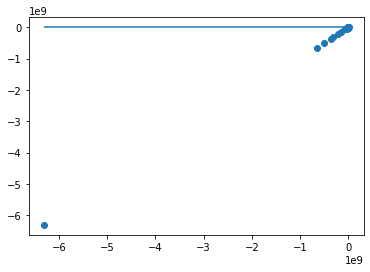

In [28]:
# Plot the results.
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()


## Determining Findings

In [29]:
# Scale data for final findings processing
X_scaler_2 = scaler.fit(X)

# Scale X data
X_scaled = X_scaler_2.transform(X)

# Run model on all data to determine overall outcomes for all countries
predictions = lr_model.predict(X)

# Preview the data
print(predictions)

[-4.50663336e+06 -1.68544451e+07  1.10925645e+07 -1.58798517e+08
 -2.61150047e+06 -1.05713768e+08 -3.34585145e+07 -2.20580941e+07
 -3.58119929e+08 -5.81947702e+05 -1.83402568e+07 -4.80949768e+07
 -6.19582077e+05 -7.02098048e+05 -6.31800014e+08 -7.04931544e+06
 -1.06728645e+06 -6.83070743e+07  7.72627291e+05 -1.45555573e+08
 -1.04054941e+08 -6.30763017e+09 -9.34489744e+07 -1.77706415e+07
 -8.77687379e+06 -3.34121423e+06 -3.20322741e+07 -2.50969361e+07
 -9.89290999e+04 -1.93820217e+07 -5.42076839e+07 -5.43868341e+07
 -1.75133229e+07 -3.75220184e+06  5.90942821e+05 -2.15839279e+06
 -2.11123181e+07 -2.72513655e+08 -6.07745471e+05 -3.85376484e+06
 -3.45031967e+08  8.00926099e+06 -3.85567431e+07 -1.70890946e+07
  7.49241536e+05 -7.97706858e+05 -2.06880286e+07 -2.96195922e+07
 -1.42179638e+06 -2.26741513e+09 -4.80974258e+08 -2.25778561e+08
 -8.42063325e+06 -2.01981312e+07 -2.18092517e+07 -2.41591554e+08
 -1.53144546e+06 -5.02886137e+08 -1.51419945e+07 -4.18229846e+07
 -2.84076991e+06 -9.71029

In [30]:
# Add column to dataset
dataframe['Predicted Correlations'] = predictions/100000

In [31]:
# Import numpy
import numpy as np

# Create standardizing function
def standardize(array):
    array1 = []
    for item in array:
        x = item
        output = ((x - 562.086598)/(2146.152805/np.sqrt(131)))
        array1.append(output)
    return array1

# Update/Standardize the 'Predicted Correlations' data column
dataframe['Predicted Correlations'] = standardize(dataframe['Predicted Correlations'])

## Results & Takeaways

#### Model Effectiveness & Feature Weights

In [32]:
import statsmodels.api as sma
import numpy as np

In [33]:
X2 = sma.add_constant(X)

est = sma.OLS(y,X2)
est2 = est.fit()

print(est2.summary())

# NOTE: R-squared represents our accuracy through accountability for variance 
# while P>|t| values represent statistical significance of each input factor 
# toward the model.

                             OLS Regression Results                            
Dep. Variable:     Case_Fatality_Ratio   R-squared:                       0.297
Model:                             OLS   Adj. R-squared:                  0.138
Method:                  Least Squares   F-statistic:                     1.869
Date:                 Mon, 23 May 2022   Prob (F-statistic):             0.0162
Time:                         21:13:02   Log-Likelihood:                -186.44
No. Observations:                  131   AIC:                             422.9
Df Residuals:                      106   BIC:                             494.8
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

/Users/sterlingmiller/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Summary

##### Our model uses linear regression and multiple features from covid records and global nutritional records to determine the correlated rpobability of fatalities due to COVID-19. Essentiall the model aims to predict how likely someone is to die from COVID-19 based on a variety of data from their country's recorded nutritional health records and COVID-19 medical record history.

##### In our final findings our model has trained and tested itself, then run itself through accuracy and validity checks as well as feature weight tests before creating a final correlated regression statistic for liklihood of fatalities for each country. The cell after this one, exports the final data with the inclusion of the column "Predicted Correlations" which provides a metrics for how much the features utilized for the calculation affect COVID-19 fatality rate. This is the (Multi)linear regression used by the model.

##### Our model produces an R^2 score of 0.603. This means that input features used within the model account for about %60 of the variance withing the model's results. This means that of all of the factors used to caluculate and predict Case_Fatality_Ratio, only 60% of the result can be explained by the factors used as inputs in the model. This can mean one of two things, either there are too many ineffective input factors being used int he model (to which we delete all factors who's significance levels are < .05) or there are input factors not accounted for in out data that contribute more prominantly to the resulting Case_Fatality_Ratio (to which we would need to find those factors and include them within our dataset).

##### Our calculations of significance levels for each input factors indicate that very few factors have a significant affect on the resulting Case_Fatality_Ratio. In fact, the only input factors proven to be statistically significant to our model are "Cases - cumulative total per 100000 population", "Deaths - cumulative total", "Deaths - cumulative total per 100000 population", and "PERSONS_BOOSTER_ADD_DOSE_PER100". As such, running the model again with only those 4 columns may potentially result in significantly more accurate results being produced.

## Exports

In [34]:
# Export Final Dataframe to CSV for Tranferability to stakeholders and non-coding partners
dataframe.to_csv('final_covid_nutrition_fatality_calculations.csv', index=False)